<a href="https://colab.research.google.com/github/6FAN/Customer-Segmentation-in-Clustering/blob/main/Customer_Segmentation_in_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

* 01: Importing Some Necessary Libraries
****
* 02: Feature Engineering
****
* 03: Data Visualization
****
* 04: Correlation
****
* 05: Label Encoding
****
* 06: Standard Scaler
****
* 07: Dimensionality reduction with PCA
****
* 08: Elbow
****
* 09: 3D Distribution Of The Cluster
****
* 10: Evaluating Models
****

# 01: Importing Some Necessary Libraries

In [ ]:
#Linear Algebra
import numpy as np

#Data Processing
import pandas as pd

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors



import warnings
warnings.filterwarnings("ignore",
            category=UserWarning)

warnings.filterwarnings("ignore",
            category=FutureWarning)

In [6]:
from google.colab import files
d = files.upload()

In [ ]:
df = pd.read_csv("marketing_campaign.csv.xls")
df.sample(10)

ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
612   6682\t1973\tBasic\tMarried\t18978\t1\t0\t11-12...                                                                                                                                                                                                                                                                                                                                                  
1746  10250\t1947\tBasic\tTogether\t28389\t0\t0\t20-...                                                                                                                                                                                                                                                                                                                                                  
962   3547\t1969\tMaster\tTogether\t41021\t1\t0\t30-...                                                                                                                                                                                                                                                                                                                                                  
539   304\t1981\tMaster\tSingle\t22944\t1\t0\t23-12-...                                                                                                                                                                                                                                                                                                                                                  
1718  10640\t1974\tGraduation\tTogether\t44392\t1\t1...                                                                                                                                                                                                                                                                                                                                                  
1048  8870\t1984\tGraduation\tTogether\t35196\t1\t0\...                                                                                                                                                                                                                                                                                                                                                  
899   905\t1986\tGraduation\tDivorced\t21846\t1\t0\t...                                                                                                                                                                                                                                                                                                                                                  
1852  1168\t1978\tPhD\tMarried\t72159\t0\t0\t29-10-2...                                                                                                                                                                                                                                                                                                                                                  
619   10862\t1960\tMaster\tMarried\t30522\t0\t1\t17-...                                                                                                                                                                                                                                                                                                                                                  
596   5252\t1969\tGraduation\tDivorced\t23910\t1\t0\...

In [ ]:
df = pd.read_csv("marketing_campaign.csv.xls", sep="\t")
df.sample(10)

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2134  4369        1957      Master         Absurd   65487.0        0   
566   9120        1962  Graduation         Single   66565.0        0   
164   8475        1973         PhD        Married  157243.0        0   
378   1729        1961         PhD       Together   66426.0        0   
2102  1241        1984    2n Cycle        Married   14796.0        1   
1327   839        1975         PhD        Married   45503.0        1   
920   9972        1955         PhD       Together   46015.0        1   
2126  2493        1966  Graduation        Married   61286.0        0   
1413  4310        1944  Graduation        Married   80589.0        0   
421   3129        1983  Graduation        Married   30096.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2134         0  10-01-2014       48       240  ...                  2   
566          1  05-12-2012       80       747  ...                  8   
164          1  01-03-2014       98        20  ...                  0   
378          1  02-10-2013       14      1043  ...                  6   
2102         0  17-09-2012        1        13  ...                  9   
1327         0  25-09-2013       54        97  ...                  5   
920          1  13-04-2014       25        38  ...                  7   
2126         1  02-08-2013       34       356  ...                  5   
1413         0  22-01-2014       25       507  ...                  1   
421          0  22-05-2014       30         5  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2134             0             0             0             0             0   
566              0             0             0             0             0   
164              0             0             0             0             0   
378              0             0             0             0             0   
2102             0             0             0             0             0   
1327             0             0             0             0             0   
920              1             0             0             0             1   
2126             0             0             0             0             0   
1413             0             0             0             1             0   
421              0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2134         0              3         11         0  
566          0              3         11         0  
164          0              3         11         0  
378          0              3         11         0  
2102         0              3         11         1  
1327         0              3         11         0  
920          0              3         11         0  
2126         0              3         11         0  
1413         0              3         11         1  
421          0              3         11         0  

[10 rows x 29 columns]

****
**PEOPLE**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
****
**PRODUCTS**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
****
**PROMOTION**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
****
**PLACE**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# 02: Feature Engineering

In [ ]:
df.shape

(2240, 29)

In [ ]:
#Information on features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**From the above output, we can conclude and note that:**
* There are missing values in income
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

 I am simply going to drop the rows that have missing income values.


In [ ]:
#Remove the nan values
df = df.dropna()

In [ ]:
df.shape

(2216, 29)

I am going to create a feature out of "Dt_Customer" that indicates the "object" in Dtype so converting to Datatime.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df[
                "Dt_Customer"])

checking new Customer and old Customer

In [ ]:
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

#Dates of the newst and oldest recoded customer
print("The newest Customer: ", max(dates))
print("The Oldest Customer: ", min(dates))

The newest Customer:  2014-12-06
The Oldest Customer:  2012-01-08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Creating a new feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
#Created a feature "Customer_For"
days = []

#Taking it to be the newest customer
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)

df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(
    df["Customer_For"], errors="coerce")
#'coerce', then invalid parsing will be set as NaN.

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [ ]:
#Total categories in the feature Marital_Status
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#Total categories in the feature Education
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [ ]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1832  7129        1962         PhD        Married  54693.0        0         1   
1332  1945        1962  Graduation        Married  71434.0        0         1   
2208  3850        1963       Basic       Together  14918.0        0         1   
593   6424        1977  Graduation       Together  33178.0        1         0   
1941  5138        1950  Graduation       Together  28320.0        0         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
1832  2013-02-17       72       686  ...             0             0   
1332  2013-09-18        4       711  ...             0             1   
2208  2012-07-12       52         3  ...             0             0   
593   2014-01-30        9        12  ...             0             0   
1941  2013-01-14       68        19  ...             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1832             0             0             0         0              3   
1332             0             1             0         0              3   
2208             0             0             0         0              3   
593              0             0             0         0              3   
1941             0             0             0         0              3   

      Z_Revenue  Response       Customer_For  
1832         11         0  56764800000000000  
1332         11         0  38361600000000000  
2208         11         0  75772800000000000  
593          11         0  26784000000000000  
1941         11         0  59702400000000000  

[5 rows x 30 columns]

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.

In [ ]:
#Age of customer today
df["Age"] = 2024 - df["Year_Birth"]
df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
121   6205        1967      Master         Single  32557.0        1         0   
1529  3536        1960  Graduation       Together  19740.0        0         1   
1882  5180        1968         PhD       Divorced  50616.0        0         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
121   2014-02-24       13        34  ...             0             0   
1529  2013-03-24       65         7  ...             0             0   
1882  2014-04-18       56       128  ...             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
121              0             0         0              3         11   
1529             0             0         0              3         11   
1882             0             0         0              3         11   

      Response       Customer_For  Age  
121          1  24624000000000000   57  
1529         0  53740800000000000   64  
1882         0  20044800000000000   56  

[3 rows x 31 columns]

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [ ]:
#Total Spending on Various items
df['Spent'] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
998   1212        1973  Graduation        Married  52845.0        1         0   
918   2625        1954    2n Cycle         Single  42607.0        0         1   
1924  7966        1959  Graduation         Single  80982.0        1         1   

     Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
998   2013-08-13        7       384  ...             0             0   
918   2013-11-17       30       156  ...             0             0   
1924  2013-08-01       48       505  ...             0             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
998              0         0              3         11         0   
918              0         0              3         11         0   
1924             0         1              3         11         0   

           Customer_For  Age  Spent  
998   41472000000000000   51    936  
918   33177600000000000   70    350  
1924  42508800000000000   65   1191  

[3 rows x 32 columns]

Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.

In [ ]:
#Marital Status
df["Living_With"] = df[
    "Marital_Status"].replace({
    "Married" : "Partner",
    "Together" : "Partner",
    "Absurd" : "Alone",
    "Widow" : "Alone",
    "YOLO" : "Alone",
    "Divorced" : "Alone",
    "Single" : "Alone",
})

df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1885  10702        1984  Graduation         Single  52413.0        1   
981    3955        1965  Graduation       Divorced   4861.0        0   
360    7274        1957  Graduation        Married  78618.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
1885         0  2012-03-11       67       185  ...             0   
981          0  2014-06-22       20         2  ...             0   
360          0  2012-09-28       87       736  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
1885             0         0              3         11         0   
981              0         0              3         11         0   
360              0         0              3         11         0   

           Customer_For  Age  Spent  Living_With  
1885  86400000000000000   40    450        Alone  
981   14428800000000000   59      6        Alone  
360   69033600000000000   67   2153      Partner  

[3 rows x 33 columns]

Create a feature "Children" to indicate total children in a household that is, kids and teenagers.

In [ ]:
df["Children"] = df["Kidhome"] + df["Teenhome"]
df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1943  10413        1984  Graduation        Married  72570.0        0   
996    8492        1978  Graduation       Together  75437.0        0   
718   10159        1970  Graduation       Divorced  58710.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
1943         0  2014-04-25       67       274  ...             0         0   
996          0  2013-09-11       25       795  ...             0         0   
718          1  2013-03-31       77       440  ...             0         0   

      Z_CostContact  Z_Revenue  Response       Customer_For  Age  Spent  \
1943              3         11         0  19440000000000000   40   1089   
996               3         11         0  38966400000000000   46   1493   
718               3         11         0  53136000000000000   54   1185   

      Living_With  Children  
1943      Partner         0  
996       Partner         0  
718         Alone         1  

[3 rows x 34 columns]

To get further clarity of household, Creating feature indicating "Family_Size"

In [ ]:
#Total Member In HouseHold
df["Family_Size"] = df[
    "Living_With"].replace({
    "Alone" : 1,
    "Partner" : 2
}) + df["Children"]

df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
536   1991        1967  Graduation       Together  44931.0        0         1   
386   6720        1968      Master       Together  43795.0        0         1   
1073  9197        1953  Graduation        Married  39722.0        0         1   

     Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  Z_Revenue  \
536   2014-01-18        0        78  ...         0              3         11   
386   2013-10-16       11       314  ...         0              3         11   
1073  2014-02-24       92        32  ...         0              3         11   

      Response       Customer_For  Age  Spent  Living_With  Children  \
536          0  27820800000000000   57     96      Partner         1   
386          1  35942400000000000   56    492      Partner         1   
1073         0  24624000000000000   71     47      Partner         1   

      Family_Size  
536             3  
386             3  
1073            3  

[3 rows x 35 columns]

Create a feature "Is_Parent" to indicate parenthood status

In [ ]:
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)
df.sample(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1530   6050        1975    2n Cycle        Married  57036.0        0   
1553   7321        1962  Graduation       Together  76081.0        0   
1275  10319        1971  Graduation        Married  66303.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  \
1530         1  2012-11-12       33      1171  ...              3         11   
1553         0  2014-05-23       85       292  ...              3         11   
1275         1  2013-02-26       56      1090  ...              3         11   

      Response       Customer_For  Age  Spent  Living_With  Children  \
1530         0  65145600000000000   49   1513      Partner         1   
1553         0  17020800000000000   62   1033      Partner         0   
1275         0  55987200000000000   53   1286      Partner         1   

      Family_Size  Is_Parent  
1530            3          1  
1553            2          0  
1275            3          1  

[3 rows x 36 columns]

 I will create three categories in the "Education" by simplifying its value counts.

In [ ]:
df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate",
    "2n Cycle" : "Undergraduate",
    "Graduation" : "Graduate",
    "Master" : "Postgraduate",
    "PhD" : "Postgraduate",
})

df.sample(5)

ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
902    6445        1967      Graduate       Together  66825.0        0   
1424   4086        1959      Graduate        Married  18690.0        0   
1149  10525        1986      Graduate         Single  26576.0        1   
578   10242        1966  Postgraduate       Together  47472.0        1   
1327    839        1975  Postgraduate        Married  45503.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  \
902          0  2013-07-14       73       243  ...              3         11   
1424         0  2012-12-28       77         6  ...              3         11   
1149         0  2012-10-13       40        10  ...              3         11   
578          1  2013-09-16       39        56  ...              3         11   
1327         0  2013-09-25       54        97  ...              3         11   

      Response       Customer_For  Age  Spent  Living_With  Children  \
902          0  44064000000000000   57    858      Partner         0   
1424         0  61171200000000000   65     60      Partner         0   
1149         1  67737600000000000   38     27        Alone         1   
578          0  38534400000000000   58     75      Partner         2   
1327         0  37756800000000000   49    170      Partner         1   

      Family_Size  Is_Parent  
902             2          0  
1424            2          0  
1149            2          1  
578             4          1  
1327            3          1  

[5 rows x 36 columns]

In [ ]:
df["Education"].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [ ]:
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [ ]:
#Renaming
df = df.rename(columns={
    "MntWines":"Wines",
    "MntFruits":"Fruits",
    'MntMeatProducts':'Meat',
    'MntFishProducts':'Fish',
    'MntSweetProducts':'Sweets',
    'MntGoldProds':'Gold'
})
df.head()

ID  Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957      Graduate         Single  58138.0        0         0   
1  2174        1954      Graduate         Single  46344.0        1         1   
2  4141        1965      Graduate       Together  71613.0        0         0   
3  6182        1984      Graduate       Together  26646.0        1         0   
4  5324        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  Wines  ...  Z_CostContact  Z_Revenue  Response  \
0  2012-04-09       58    635  ...              3         11         1   
1  2014-08-03       38     11  ...              3         11         0   
2  2013-08-21       26    426  ...              3         11         0   
3  2014-10-02       26     11  ...              3         11         0   
4  2014-01-19       94    173  ...              3         11         0   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  83894400000000000   67   1617        Alone         0            1   
1  10800000000000000   70     27        Alone         2            3   
2  40780800000000000   59    776      Partner         0            2   
3   5616000000000000   40     53      Partner         1            3   
4  27734400000000000   43    422      Partner         1            3   

   Is_Parent  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 36 columns]

In [ ]:
#Dropping Some unnecessary Features
to_drop = ["Marital_Status", "Dt_Customer",
           "Z_CostContact", "Z_Revenue",
           "Year_Birth", "ID"]

df = df.drop(to_drop, axis=1)

In [ ]:
df.tail()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
2235    42     118  ...             0         0         0  46742400000000000   
2236     0       0  ...             0         0         0   5270400000000000   
2237    32      12  ...             0         0         0  27216000000000000   
2238    80      30  ...             0         0         0  27302400000000000   
2239     2       1  ...             0         0         1  67564800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
2235   57   1341      Partner         1            3          1  
2236   78    444      Partner         3            5          1  
2237   43   1241        Alone         0            1          0  
2238   68    843      Partner         1            3          1  
2239   70    172      Partner         2            4          1  

[5 rows x 30 columns]

In [ ]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     55.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      28.000000     5.000000     0.000000     1.000000     0.000000  
25%      47.000000    69.000000     0.000000     2.000000     0.000000  
50%      54.000000   396.500000     1.000000     3.000000     1.000000  
75%      65.000000  1048.000000     1.000000     3.000000     1.000000  
max     131.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

* The above stats show some deviation in mean Income and Age and max Income and age.
* Do note that max-age is 128 years, As I calculated the age that would be today (i.e. 2024) and the data is old.
* I must take a look at the broader view of the data. I will plot some of the selected features.

# 03: Data Visualization

In [ ]:
#Setting Up colors prefrences
sns.set_style("darkgrid")
sns.set_theme("paper")

#sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})

pallet = ["#682F2F", "#9E726F", "#D6B2B1",
          "#B9C0C9", "#9F8A78", "#F3AB60"]

cmap = sns.color_palette("Spectral", as_cmap=True)

<Figure size 480x360 with 0 Axes>

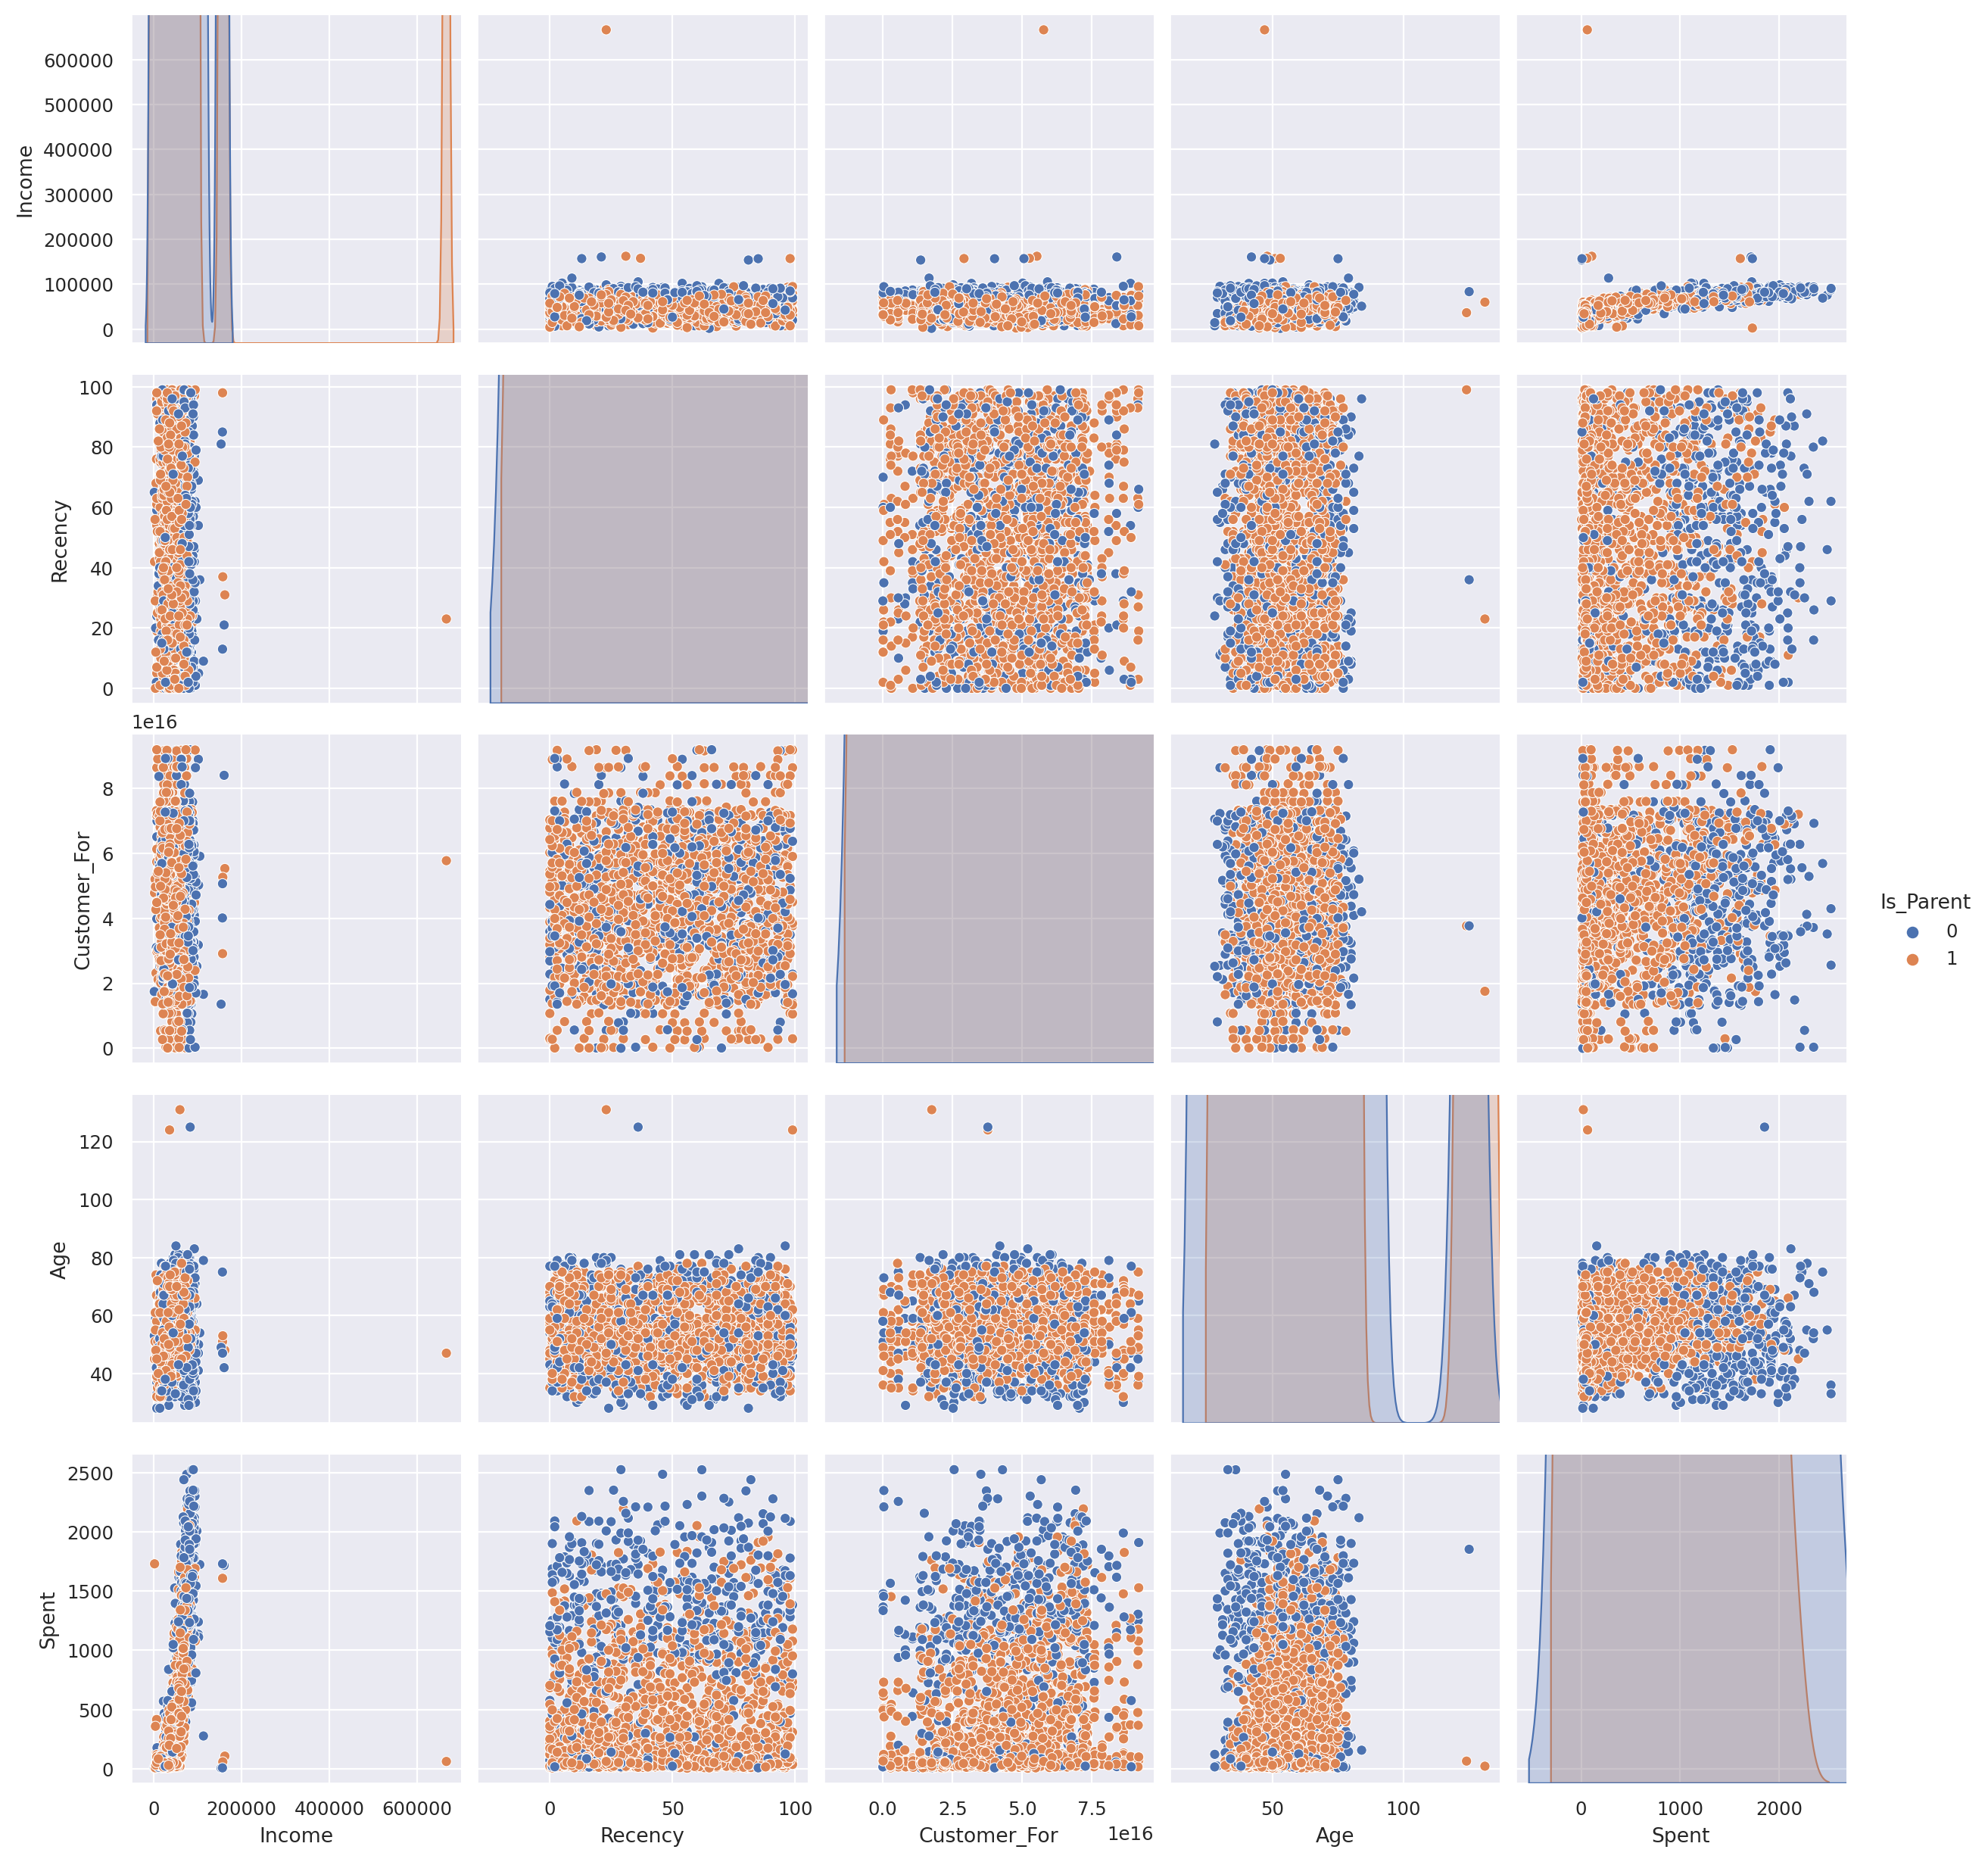

In [ ]:
#Plotting following features
To_Plot = [ "Income", "Recency",
           "Customer_For", "Age",
           "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot],
             hue="Is_Parent",)

plt.show()

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [ ]:
#Dropping The Outliers
df = df[df["Age"]<90]
df = df[df["Income"]<600000]
df.shape

(2212, 30)

# 04: Correlation

In [ ]:
df_cor = df.corr()
df_cor

Income   Kidhome  Teenhome   Recency     Wines  \
Income               1.000000 -0.514523  0.034565  0.007965  0.688209   
Kidhome             -0.514523  1.000000 -0.039066  0.010623 -0.497203   
Teenhome             0.034565 -0.039066  1.000000  0.014392  0.003945   
Recency              0.007965  0.010623  0.014392  1.000000  0.015981   
Wines                0.688209 -0.497203  0.003945  0.015981  1.000000   
Fruits               0.507354 -0.373258 -0.175905 -0.005257  0.385844   
Meat                 0.692279 -0.439031 -0.261134  0.022914  0.568081   
Fish                 0.520040 -0.388643 -0.205235  0.000788  0.396915   
Sweets               0.523599 -0.377843 -0.163107  0.025244  0.389583   
Gold                 0.388299 -0.354922 -0.018579  0.018148  0.391461   
NumDealsPurchases   -0.108207  0.216594  0.386805  0.002591  0.009117   
NumWebPurchases      0.459265 -0.372327  0.162239 -0.005680  0.553663   
NumCatalogPurchases  0.696589 -0.504598 -0.112477  0.024197  0.634237   
NumStorePurchases    0.631424 -0.501863  0.049212 -0.000460  0.640219   
NumWebVisitsMonth   -0.650257  0.447258  0.130985 -0.018965 -0.321616   
AcceptedCmp3        -0.015152  0.016135 -0.042797 -0.032361  0.061360   
AcceptedCmp4         0.219633 -0.162111  0.038168  0.017520  0.373349   
AcceptedCmp5         0.395569 -0.204582 -0.190119  0.000233  0.472889   
AcceptedCmp1         0.327524 -0.174261 -0.145198 -0.021147  0.351610   
AcceptedCmp2         0.104036 -0.081911 -0.015633 -0.001429  0.206309   
Complain            -0.027900  0.037067  0.007746  0.005713 -0.036420   
Response             0.161387 -0.077901 -0.154402 -0.200114  0.246320   
Customer_For        -0.027892 -0.057731  0.008986  0.030748  0.148745   
Age                  0.199977 -0.237497  0.361932  0.015694  0.164615   
Spent                0.792740 -0.557949 -0.137964  0.020479  0.892996   
Children            -0.343529  0.688081  0.698199  0.018062 -0.353356   
Family_Size         -0.286638  0.583250  0.594481  0.014717 -0.296702   
Is_Parent           -0.403132  0.520355  0.587993  0.002189 -0.341994   

                       Fruits      Meat      Fish    Sweets      Gold  ...  \
Income               0.507354  0.692279  0.520040  0.523599  0.388299  ...   
Kidhome             -0.373258 -0.439031 -0.388643 -0.377843 -0.354922  ...   
Teenhome            -0.175905 -0.261134 -0.205235 -0.163107 -0.018579  ...   
Recency             -0.005257  0.022914  0.000788  0.025244  0.018148  ...   
Wines                0.385844  0.568081  0.396915  0.389583  0.391461  ...   
Fruits               1.000000  0.546740  0.593038  0.571474  0.393459  ...   
Meat                 0.546740  1.000000  0.572986  0.534624  0.357556  ...   
Fish                 0.593038  0.572986  1.000000  0.583484  0.426299  ...   
Sweets               0.571474  0.534624  0.583484  1.000000  0.356754  ...   
Gold                 0.393459  0.357556  0.426299  0.356754  1.000000  ...   
NumDealsPurchases   -0.134191 -0.121128 -0.143147 -0.121395  0.053047  ...   
NumWebPurchases      0.302301  0.306841  0.299428  0.333608  0.407873  ...   
NumCatalogPurchases  0.485611  0.733787  0.532241  0.494623  0.441656  ...   
NumStorePurchases    0.459875  0.486349  0.457885  0.455150  0.390693  ...   
NumWebVisitsMonth   -0.417741 -0.539194 -0.446151 -0.422289 -0.245973  ...   
AcceptedCmp3         0.014644  0.018416 -0.000276  0.001660  0.125557  ...   
AcceptedCmp4         0.006598  0.091677  0.016058  0.029206  0.024305  ...   
AcceptedCmp5         0.208990  0.375252  0.194793  0.258417  0.176628  ...   
AcceptedCmp1         0.192417  0.313379  0.261712  0.245113  0.170853  ...   
AcceptedCmp2        -0.009924  0.043549  0.002322  0.010142  0.050976  ...   
Complain            -0.002956 -0.021017 -0.019098 -0.020569 -0.030166  ...   
Response             0.123007  0.237966  0.108135  0.116059  0.141096  ...   
Customer_For         0.059828  0.071381  0.078042  0.076345  0.145632  ...   
Age                  0.013447  0.

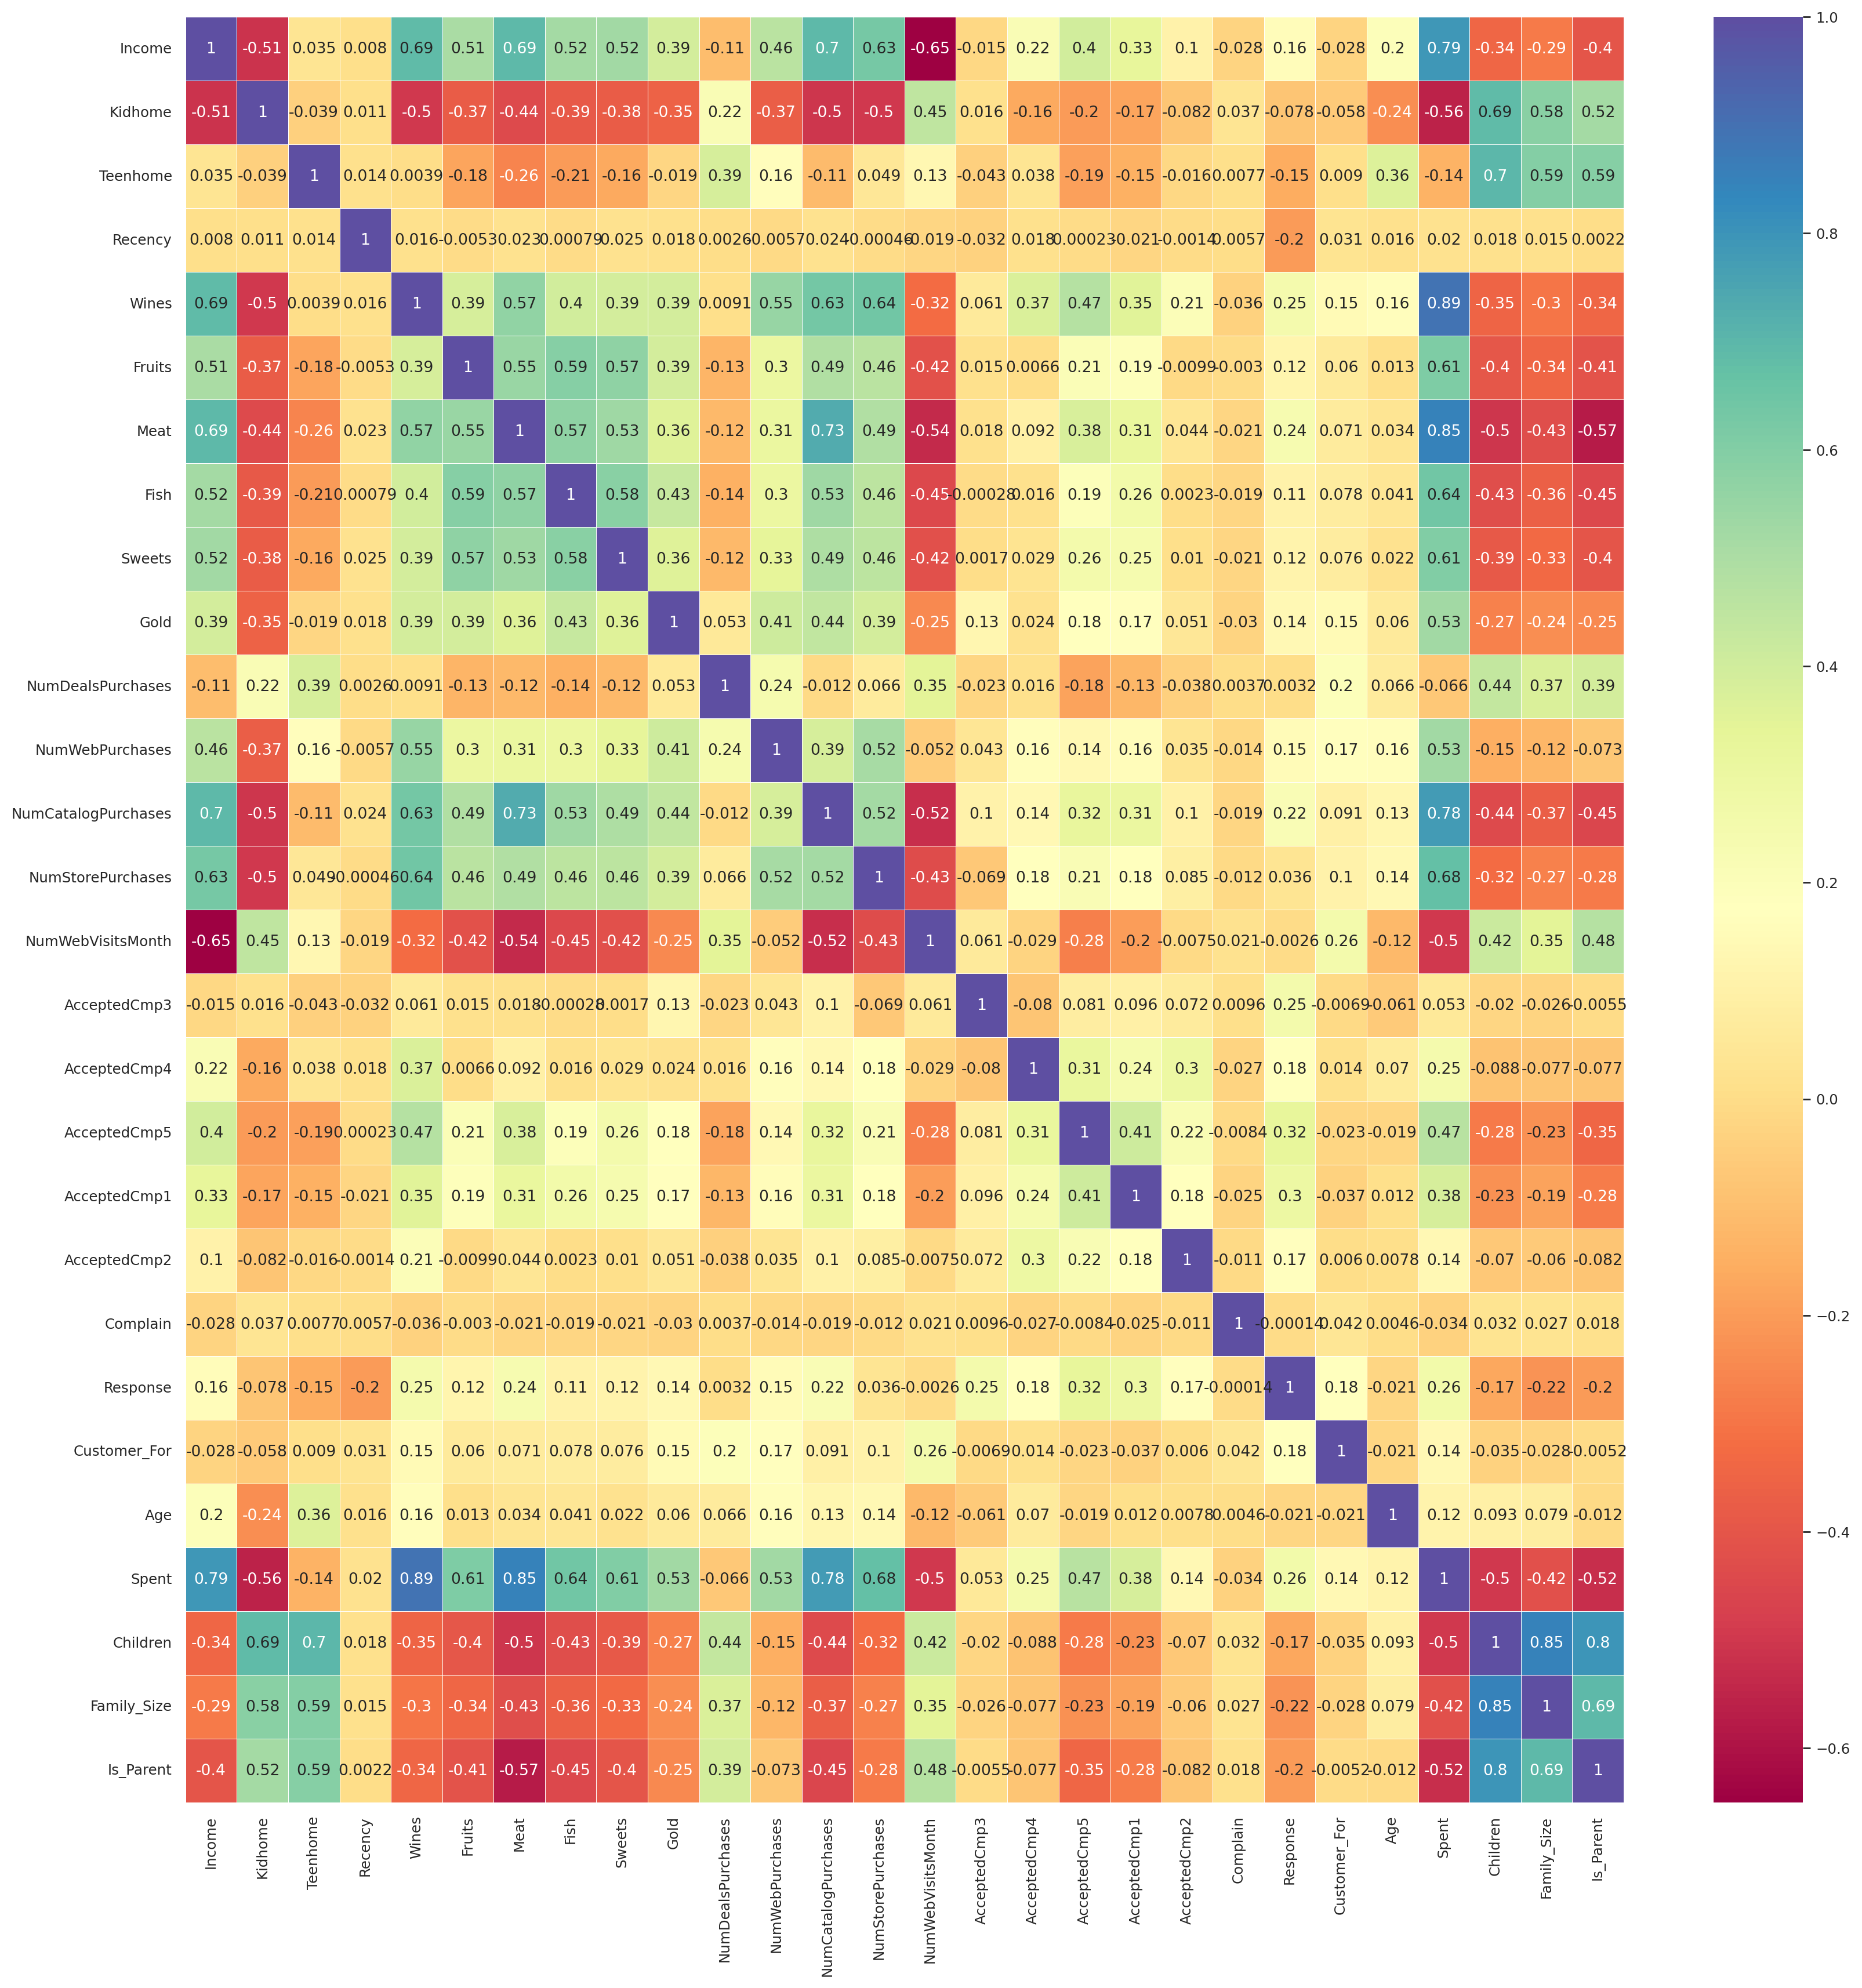

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    data=df_cor,
    annot=True,
    linewidths=0.3,
    cmap=cmap
)

plt.show()

# 05: Label Encoding

In [ ]:
#Get List of Categorical Variables
s = (df.dtypes=='object')
object_col = list(s[s].index)
object_col

['Education', 'Living_With']

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in object_col:
    df[i] = df[[i]].apply(LE.fit_transform)

In [ ]:
df

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0      172      88  ...             0         0         1  83894400000000000   
1        2       1  ...             0         0         0  10800000000000000   
2      111      21  ...             0         0         0  40780800000000000   
3       10       3  ...             0         0         0   5616000000000000   
4       46      27  ...             0         0         0  27734400000000000   
...    ...     ...  ...           ...       ...       ...                ...   
2235    42     118  ...             0         0         0  46742400000000000   
2236     0       0  ...             0         0         0   5270400000000000   
2237    32      12  ...             0         0         0  27216000000000000   
2238    80      30  ...             0         0         0  27302400000000000   
2239     2       1  ...             0         0         1  67564800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0      67   1617            0         0            1          0  
1      70     27            0         2            3          1  
2      59    776            1         0            2          0  
3      40     53            1         1            3          1  
4      43    422            1         1            3          1  
...   ...    ...          ...       ...          ...        ...  
2235   57   1341            1         1            3          1  
2236   78    444            1         3            5          1  
2237   43   1241            0         0            1          0  
2238   68    843            1         1            3          1  
2239   70    172            1         2            4          1  

[2212 rows x 30 columns]

In [ ]:
df['Education'].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

* Graduate(0)       :  1116
* Postgraduate(1)   :  846
* Undergraduate(2)  :  254

In [ ]:
df['Living_With'].value_counts()

1    1428
0     784
Name: Living_With, dtype: int64

* Partner(1)   : 1430
* Alone(0)     :  786

In [ ]:
# Creating A Copy Of Data
ds = df.copy()

creating a subset of dataframe by dropping the features on deals accepted and promotions

In [ ]:
col_del = ['AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5','AcceptedCmp1',
           'AcceptedCmp2', 'Complain',
           'Response']
ds = ds.drop(col_del, axis=1)
ds.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0      88  ...                   10                  4                  7   
1       1  ...                    1                  2                  5   
2      21  ...                    2                 10                  4   
3       3  ...                    0                  4                  6   
4      27  ...                    3                  6                  5   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  83894400000000000   67   1617            0         0            1   
1  10800000000000000   70     27            0         2            3   
2  40780800000000000   59    776            1         0            2   
3   5616000000000000   40     53            1         1            3   
4  27734400000000000   43    422            1         1            3   

   Is_Parent  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 23 columns]

# 06: Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds),
                        columns=ds.columns)

scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

# 07: Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(
    scaled_ds), columns=([
    "col1", "col2", "col3"
]))

PCA_ds.head()

col1      col2      col3
0  4.994347 -0.151265  2.647530
1 -2.884455 -0.006688 -1.863693
2  2.617864 -0.720736 -0.252927
3 -2.676036 -1.541972 -0.922948
4 -0.649591  0.209874 -0.021062

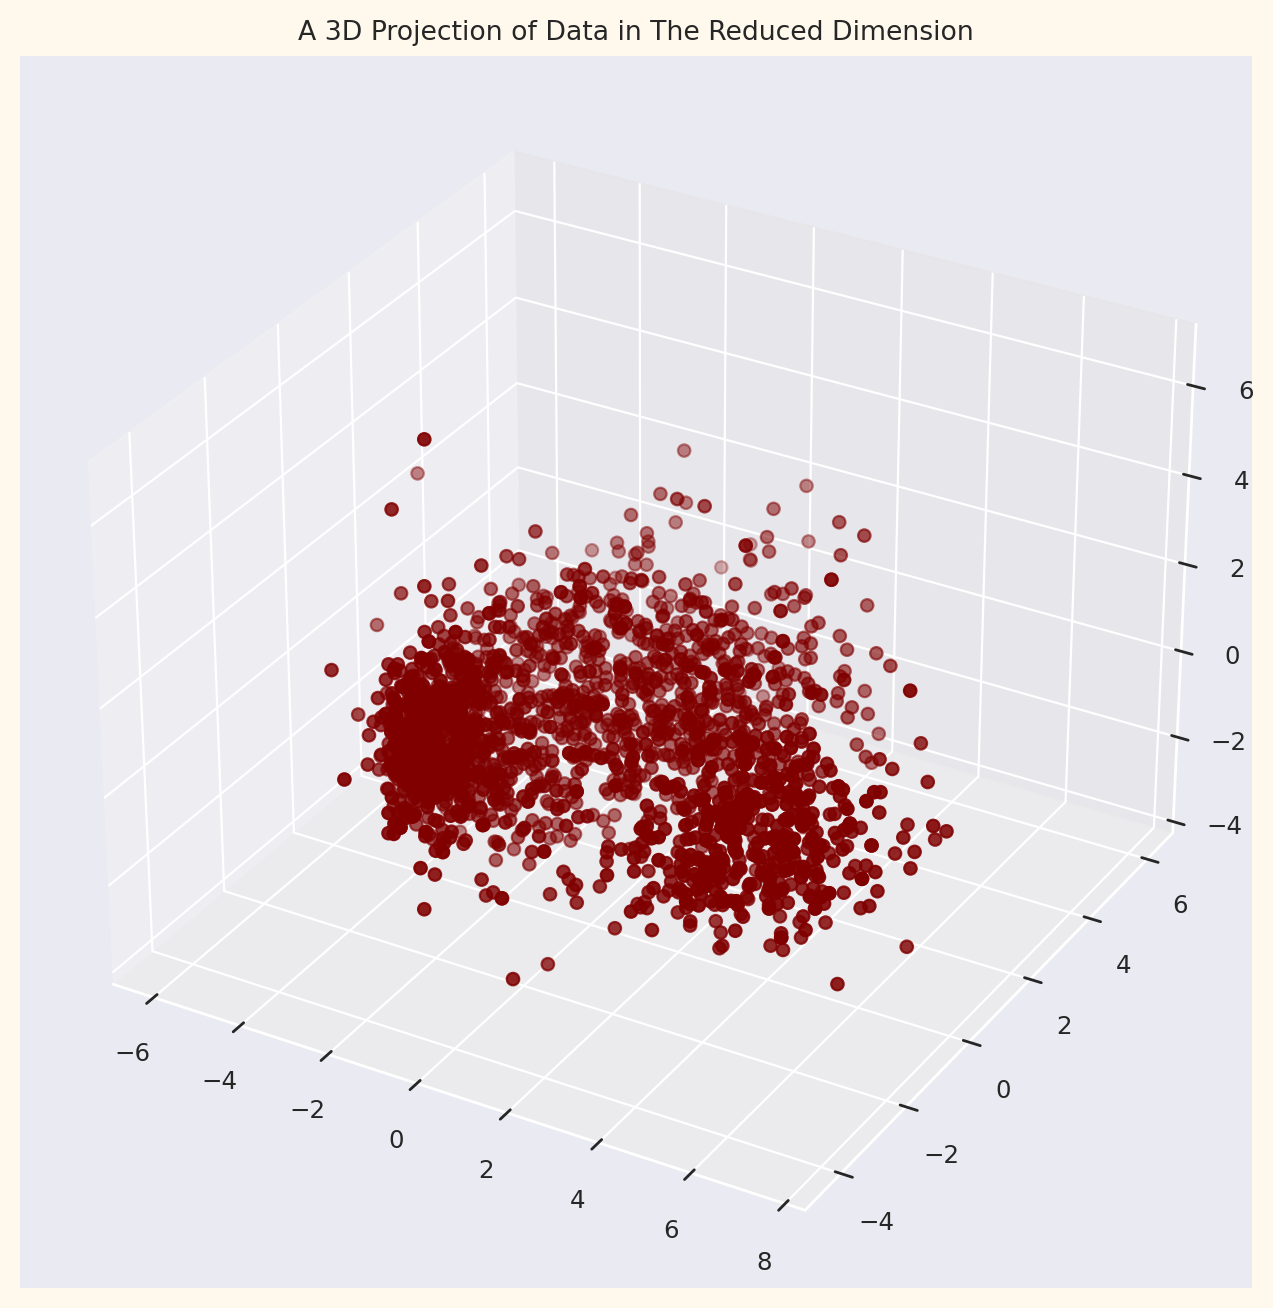

In [ ]:
#3D Projection
x = PCA_ds["col1"]
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig = plt.figure(figsize=(10, 8),
                 facecolor="#FFF9ED",)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection of Data in The Reduced Dimension")
plt.show()

# 08: Elbow

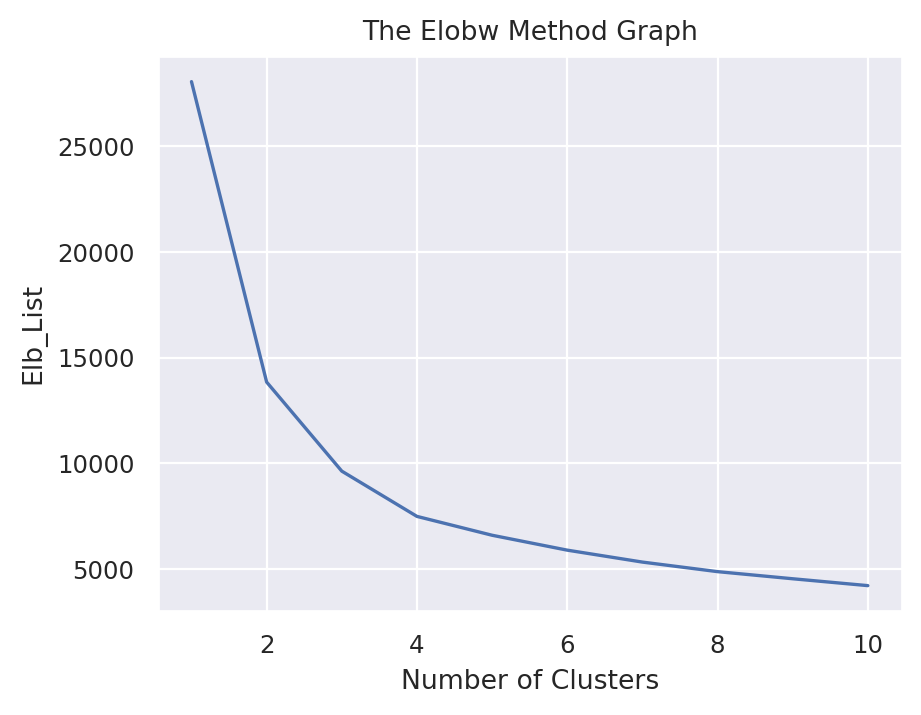

In [ ]:
from sklearn.cluster import KMeans

Elb_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                   init='k-means++',
                   random_state=25)
    kmeans.fit(PCA_ds)
    Elb_list.append(kmeans.inertia_)

plt.plot(range(1, 11), Elb_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Elb_List')
plt.show()

**Another method**

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


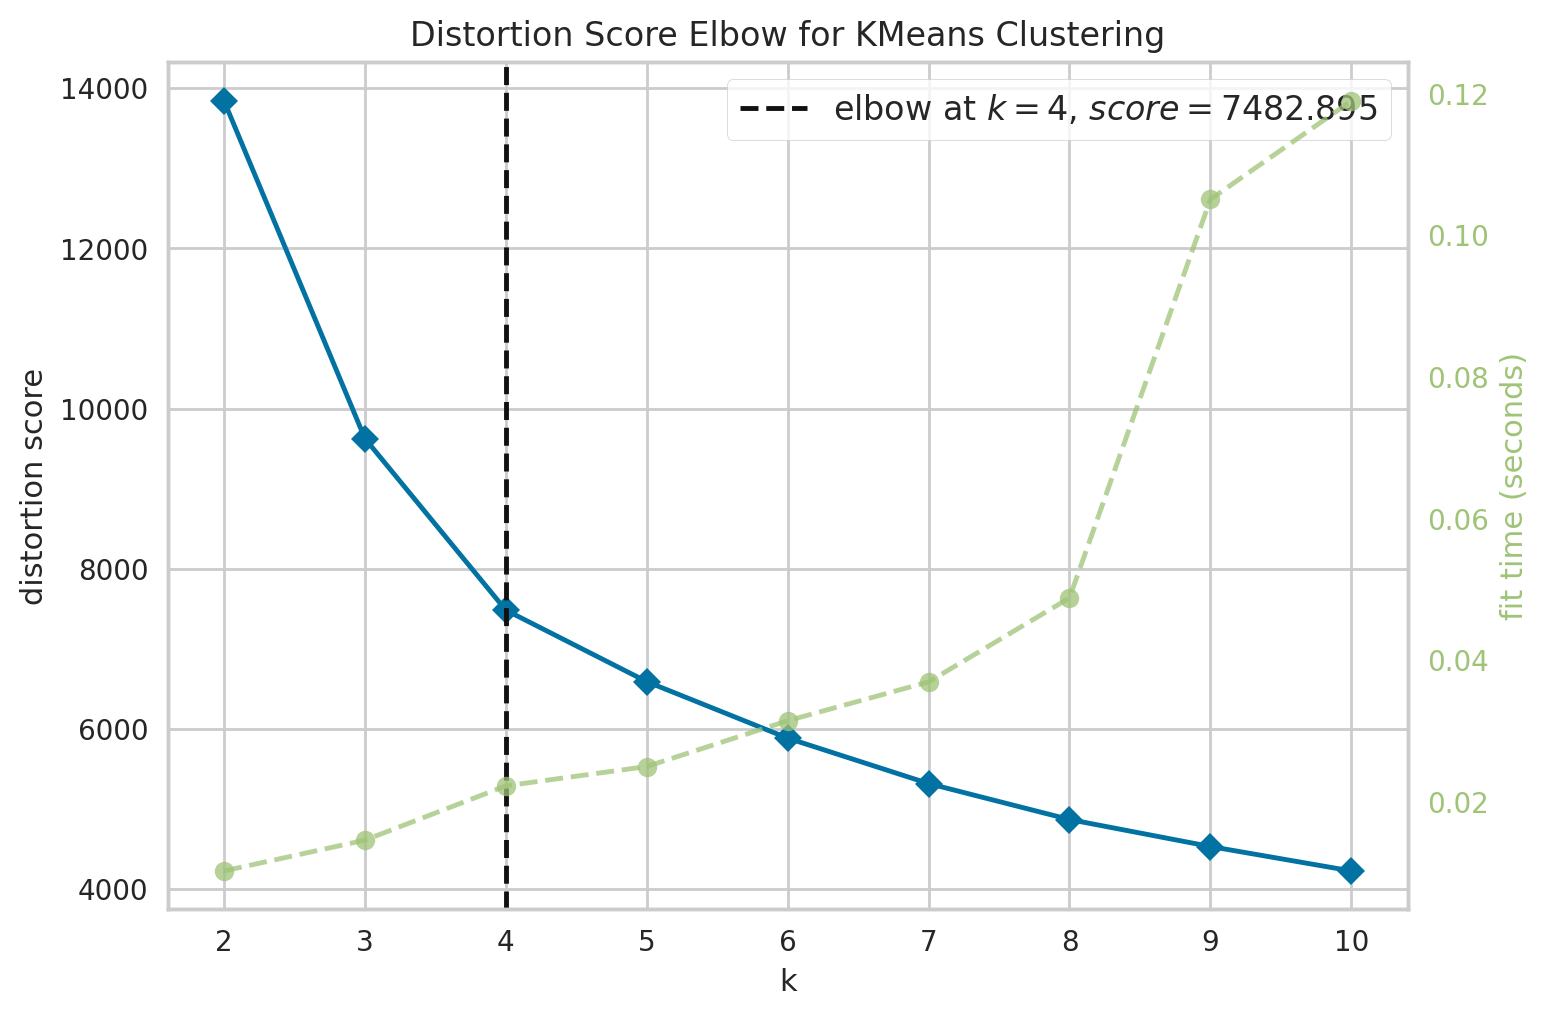

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_ds)
Elbow.show()

In [ ]:
#Initiating the Kmeans Clustering
kmeans = KMeans(n_clusters=4,
               random_state=25)

#Fit model and predict clusters
KM = kmeans.fit_predict(PCA_ds)
PCA_ds['Clusters'] = KM

#Adding original Data Farme
df['Cluster'] = KM

# 09: 3D Distribution Of The Cluster

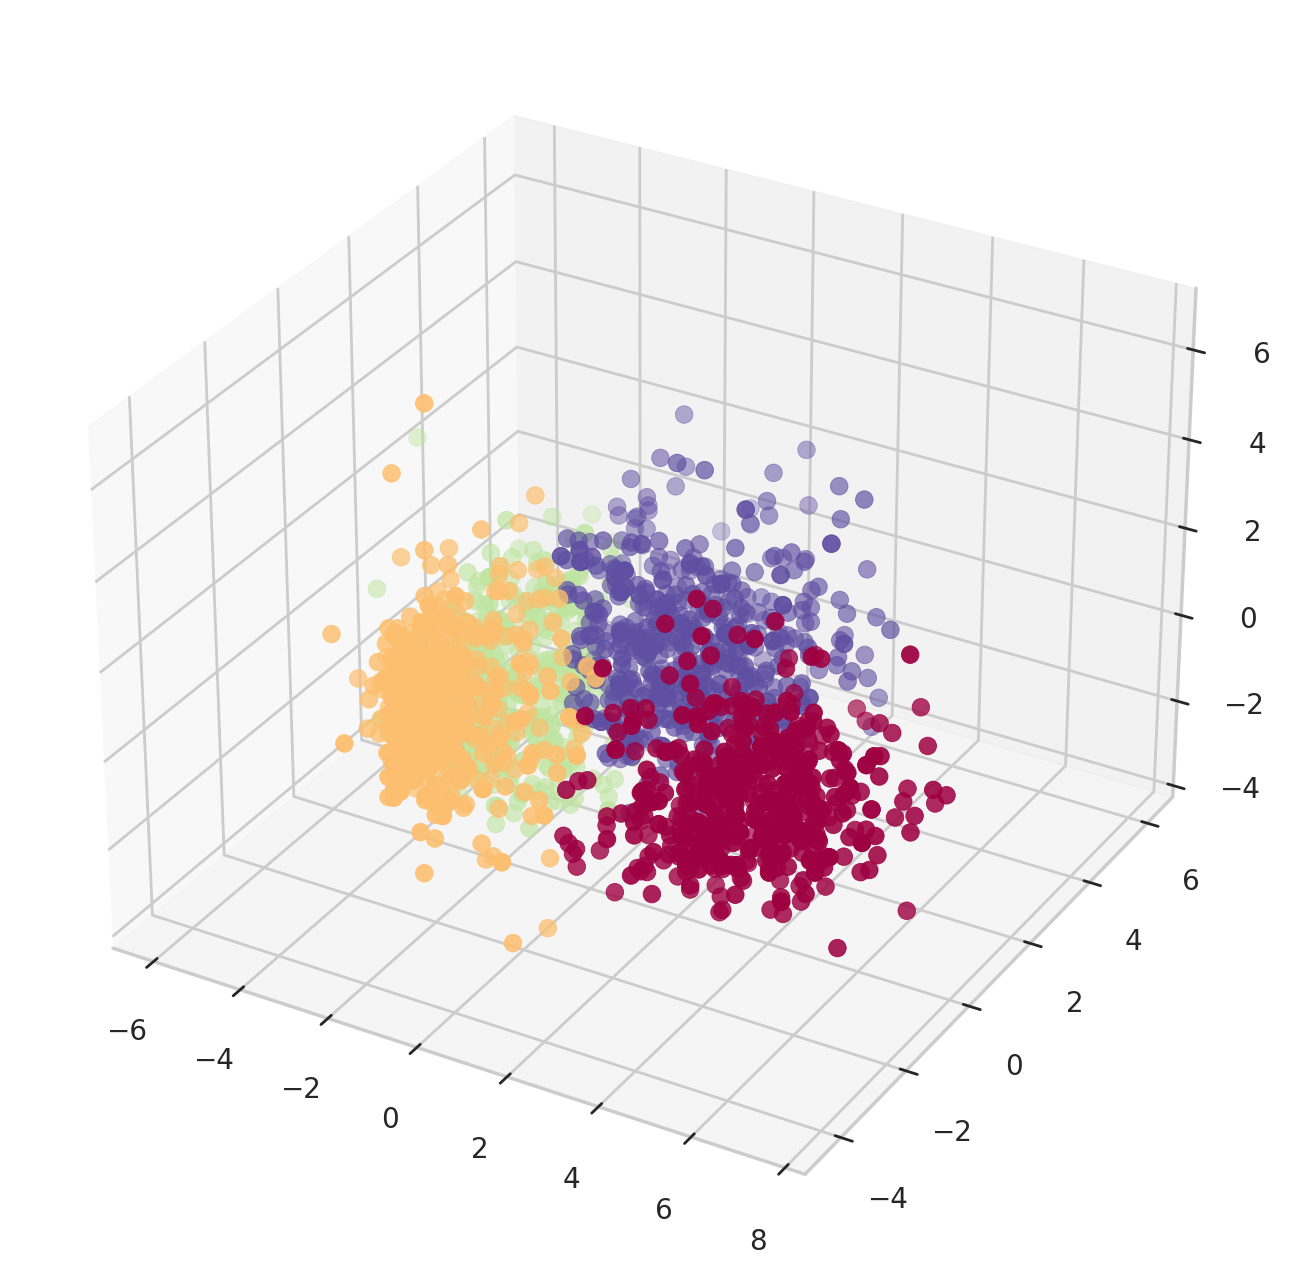

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='3d')
ax.scatter(
        x, y, z, s=40,
        c=PCA_ds["Clusters"],
        cmap = cmap,
        marker = 'o')
plt.show()

In [ ]:
fig = px.scatter_3d(PCA_ds,
                    x=x,
                    y=y,
                    z=z,
                    color="Clusters",
                    opacity=0.5
                    )

fig.show()


# 10: Evaluating Models

Firstly, let us have a look at the group distribution of clustring

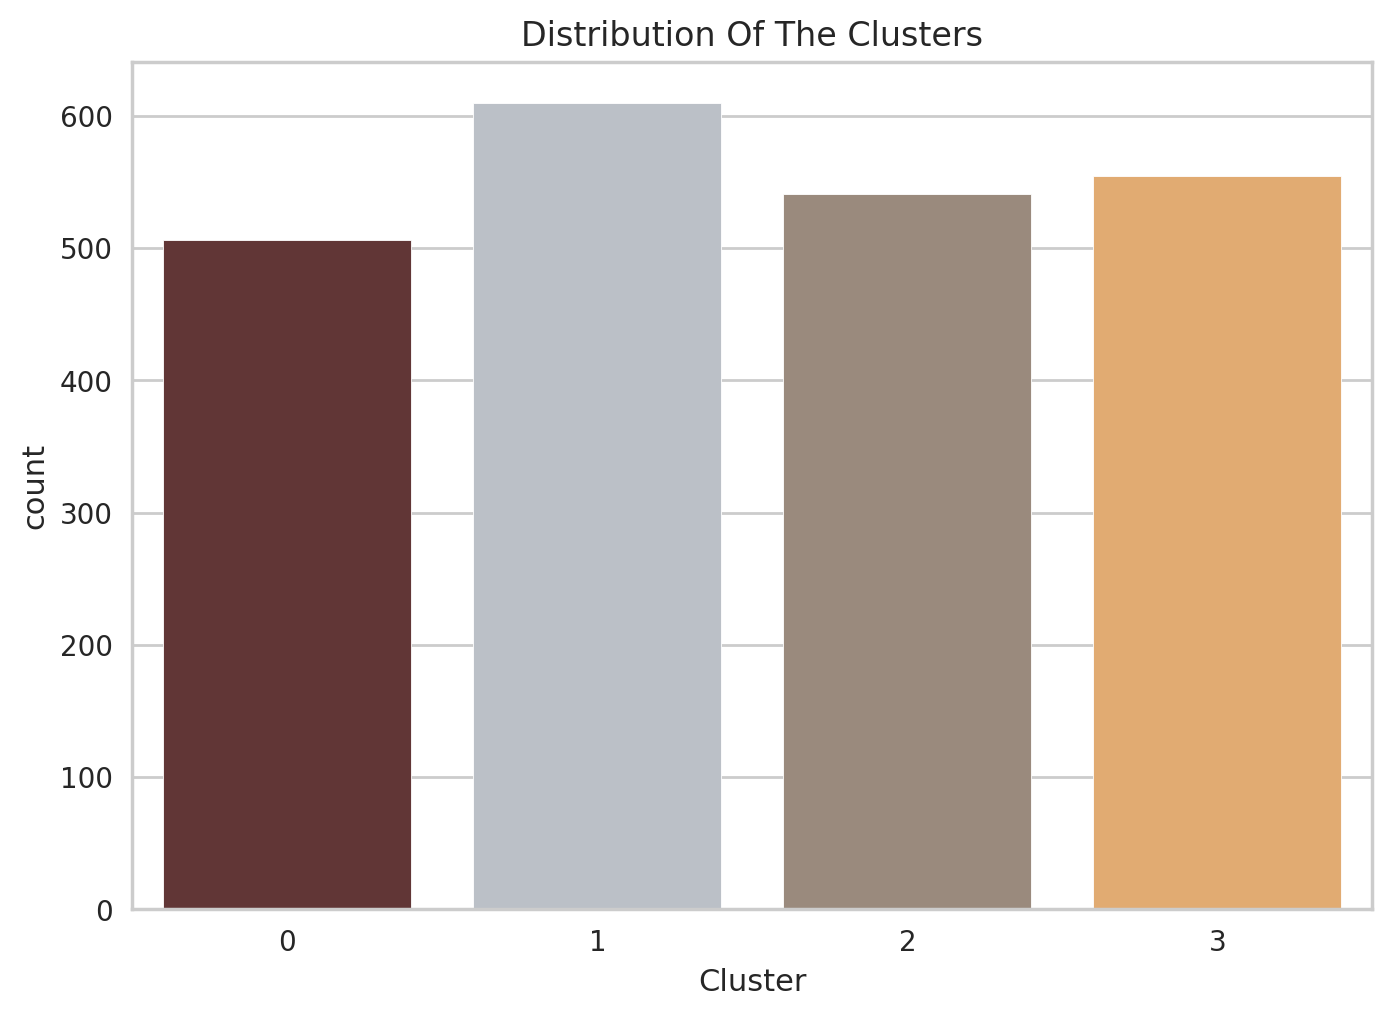

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Cluster"],
                  palette=pal)
pl.set_title('Distribution Of The Clusters')
plt.show()

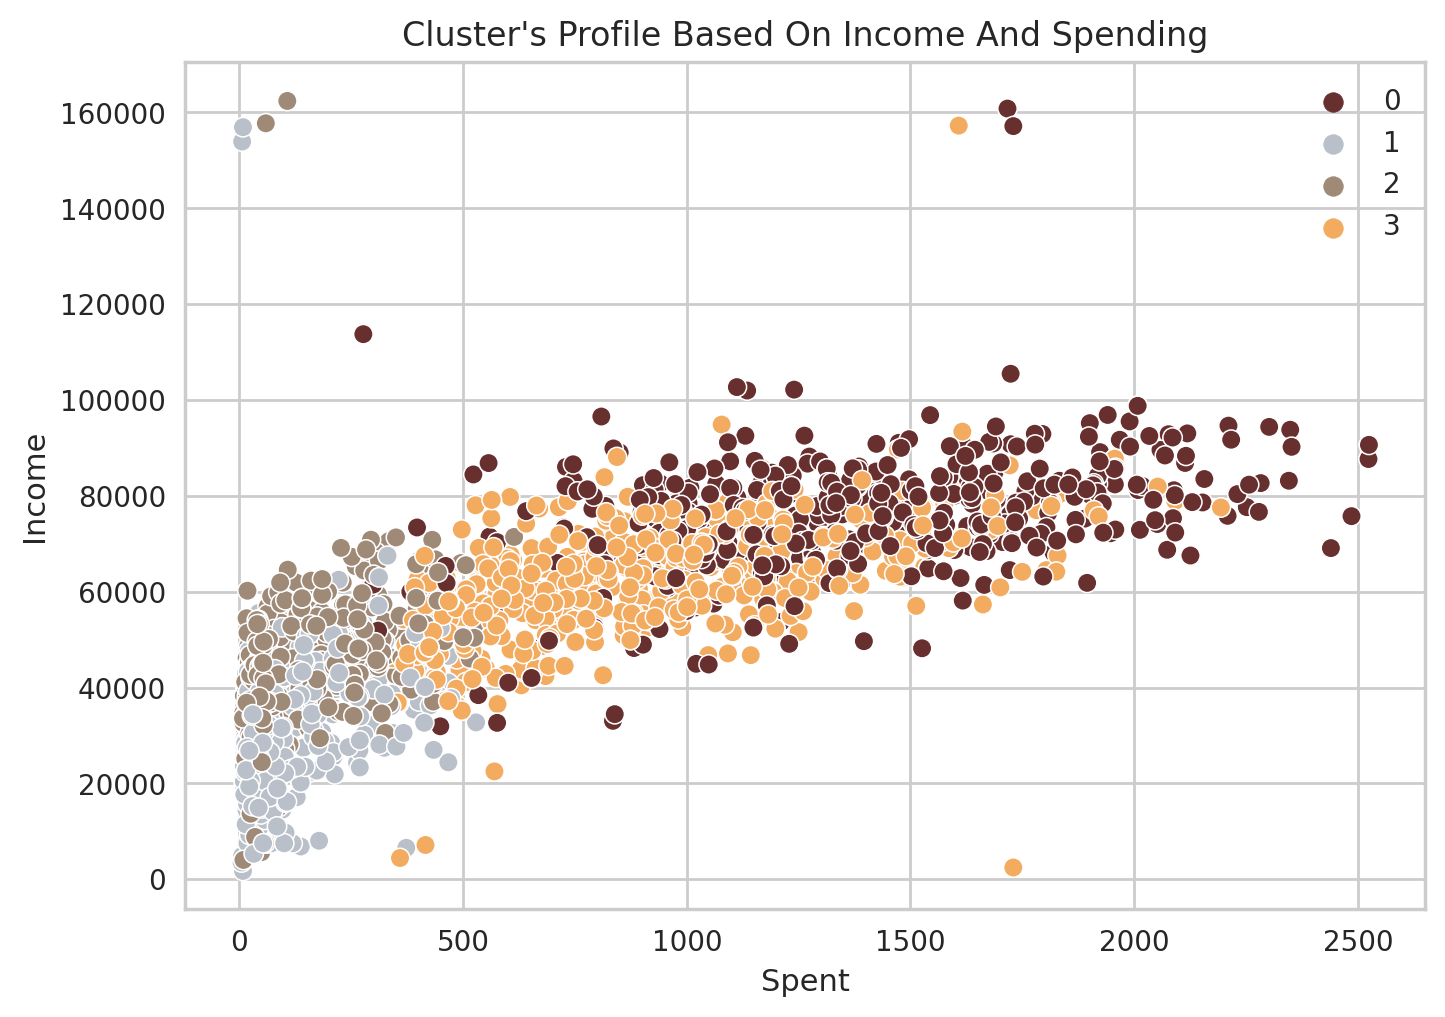

In [ ]:
sns.scatterplot(data=df,
                x=df["Spent"],
                y=df["Income"],
                hue=df["Cluster"],
                palette=pal)
plt.title("Cluster's Profile Based On Income And Spending")

plt.legend()
plt.show()

In [ ]:
fig = px.scatter(data_frame=df, x="Spent", y="Income", color="Cluster")
fig.show()

**Income vs spending plot shows the clusters pattern**

* group 0: high spending & high income
* group 1: low spending & low income
* group 2: low spending & high income
* group 3: high spending & average income